In [1]:
from google.colab import drive
drive.mount("/content/drive")

files = 'drive/MyDrive/Analysis Framework/scheme2_nano.root'

Mounted at /content/drive


In [2]:
pip install coffea

     |████████████████████████████████| 163kB 8.9MB/s 
     |████████████████████████████████| 17.7MB 1.3MB/s 
     |████████████████████████████████| 6.2MB 29.1MB/s 
     |████████████████████████████████| 194kB 55.1MB/s 
     |████████████████████████████████| 1.8MB 56.9MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 33.7MB/s 
     |████████████████████████████████| 5.4MB 35.7MB/s 
     |████████████████████████████████| 122kB 48.7MB/s 
     |████████████████████████████████| 25.3MB 55.7MB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0


In [3]:
import numpy as np
import awkward1 as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor, hist
import matplotlib.pyplot as plt

In [4]:
fname = 'drive/MyDrive/Analysis Framework/scheme2_nano.root'
events = NanoEventsFactory.from_file(fname, schemaclass=NanoAODSchema).events()

/usr/local/lib/python3.6/dist-packages/coffea/nanoevents/factory.py:87: UserWarning: DEPRECATION NOTICE:
NanoEventsFactory.from_file is deprecated, please migrate your code to use NanoEventsFactory.from_root.
Using NanoEventsFactory.from_file will result in an error in the next major release of coffea.
  "DEPRECATION NOTICE:\nNanoEventsFactory.from_file is deprecated, please"


In [ ]:
events.fields

['SoftActivityJetHT10',
 'fixedGridRhoFastjetAll',
 'SubGenJetAK8',
 'TkMET',
 'SoftActivityJetHT5',
 'CaloMET',
 'PSWeight',
 'TrigObj',
 'L1simulation',
 'LHE',
 'LHEWeight',
 'LHEScaleWeight',
 'MET',
 'PV',
 'btagWeight',
 'IsoTrack',
 'Photon',
 'SubJet',
 'SV',
 'SoftActivityJet',
 'SoftActivityJetNjets5',
 'HLTriggerFinalPath',
 'Flag',
 'GenVisTau',
 'LHEPart',
 'HLTriggerFirstPath',
 'fixedGridRhoFastjetCentralCalo',
 'SoftActivityJetHT',
 'GenJetAK8',
 'Electron',
 'SoftActivityJetHT2',
 'GenJet',
 'GenDressedLepton',
 'Jet',
 'Muon',
 'Pileup',
 'FatJet',
 'RawMET',
 'genWeight',
 'OtherPV',
 'Generator',
 'genTtbarId',
 'PuppiMET',
 'HLT',
 'fixedGridRhoFastjetCentralNeutral',
 'L1Reco',
 'LHEPdfWeight',
 'GenMET',
 'SoftActivityJetNjets2',
 'event',
 'luminosityBlock',
 'run',
 'Tau',
 'GenPart',
 'SoftActivityJetNjets10']

In [ ]:
events.Electron

<ElectronArray [[Electron, Electron], ... [Electron]] type='8200 * var * electron'>

In [ ]:
events.Electron.fields

['charge',
 'cleanmask',
 'convVeto',
 'cutBased',
 'cutBased_Fall17_V1',
 'cutBased_HEEP',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'genPartFlav',
 'genPartIdx',
 'genPartIdxG',
 'hoe',
 'ip3d',
 'isPFcand',
 'jetIdx',
 'jetIdxG',
 'lostHits',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V1Iso',
 'mvaFall17V1Iso_WP80',
 'mvaFall17V1Iso_WP90',
 'mvaFall17V1Iso_WPL',
 'mvaFall17V1noIso',
 'mvaFall17V1noIso_WP80',
 'mvaFall17V1noIso_WP90',
 'mvaFall17V1noIso_WPL',
 'mvaFall17V2Iso',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'mvaTTH',
 'pdgId',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'photonIdx',
 'photonIdxG',
 'pt',
 'r9',
 'sieie',
 'sip3d',
 'tightCharge',
 'vidNestedWPBitmap']

# Particle selection

In [ ]:
Electron = events.Electron
Muon = events.Muon
Photon = events.Photon
MET = events.MET

In [ ]:
MET_mask = MET.pt > 20
Electron_mask = (Electron.pt > 20) & (np.abs(Electron.eta) < 2.5) & (Electron.cutBased > 1)
Photon_mask = (Photon.pt > 20) & (np.abs(Photon.eta) < 2.5) & (Photon.cutBasedBitmap > 0)

In [ ]:
Ele_Sel_mask = ak.num(Electron[Electron_mask]) > 2
Pho_Sel_mask = ak.num(Photon[Photon_mask]) > 0

Event_mask = Ele_Sel_mask & Pho_Sel_mask

# Event Selection - eee chanel

In [ ]:
Ele_channel_events = events[Event_mask]

Ele = Ele_channel_events.Electron
Pho = Ele_channel_events.Photon
Met = Ele_channel_events.MET

In [ ]:
print(ak.Array.__len__(Ele))
print(ak.Array.__len__(Pho))
print(ak.Array.__len__(Met))

167
167
167


In [ ]:
# All possible triplet of Electron in each event
ele_tri = ak.combinations(Ele, 3, axis=1)

In [ ]:
# Choose OSSF 
Tri_first, Tri_second, Tri_third = ak.unzip(ele_tri)
Tri_ele = Tri_first + Tri_second + Tri_third

print(Tri_ele)

[[{x: -5.58, y: 36.6, z: 162, t: 191, charge: 1}, ... z: 530, t: 799, charge: 1}]]


In [ ]:
# Veto same sign set and events
N_Before_ss_filter = ak.Array.__len__(Tri_ele)
Tri_SSVeto_Mask = ((Tri_first.charge == Tri_second.charge) == Tri_third.charge)
Tri_ele = Tri_ele[Tri_SSVeto_Mask]

Tri_SSVeto_evtMask = ak.num(Tri_ele) > 0
Tri_ele = Tri_ele[Tri_SSVeto_evtMask]
MET_SSVeto = Met[Tri_SSVeto_evtMask]

In [ ]:
N_After_ss_filter = ak.Array.__len__(Tri_ele)

In [ ]:
print(Tri_ele)
print("Veto SS Eff: {0}%".format(round(N_After_ss_filter / N_Before_ss_filter * 100,2)))

[[{x: 9.97, y: -145, z: 802, t: 1.07e+03, charge: -1, ... t: 361, charge: 3}]]
Veto SS Eff: 22.16%


In [ ]:
# Choose OSSF lepton pairs that meet Z mass window
def ossf_zmass_check(p1, p2):
  return ((p1.charge != p2.charge) & (np.abs(91.18 - (p1 + p2).mass) < 30.))

e1e2 = ossf_zmass_check(Tri_first, Tri_second)
e1e3 = ossf_zmass_check(Tri_first, Tri_third)
e2e3 = ossf_zmass_check(Tri_second, Tri_third)

In [ ]:
# Calculate Z mass and W MT
Triplet = Tri_ele[ak.num(Tri_ele[e1e3]) > 0]
#MET_OSSF = MET_SSVeto[ak.num(Tri_ele[e1e3]) > 0]

In [ ]:
# Select High-PT ordered set
Triplet = Triplet[ak.argmax(Tri_first.pt, axis=1)]

In [ ]:
print(Triplet)

[[{x: 9.97, y: -145, z: 802, t: 1.07e+03, ... t: 1.07e+03, charge: -1}]]


In [ ]:
# Z mass
# Di_ele = Triplet.i0 + Triplet.i2
# Mee = ak.to_numpy(Triplet.mass)
# Mee = Mee.flatten()

# 테스트 공간!!!!!!!!!!!!! 더블 배럴 준비 완료


In [210]:
Electron = events.Electron
Muon = events.Muon
Photon = events.Photon
MET = events.MET

In [211]:
print(Electron)
print(Muon)
print(Photon)
print(MET)

[[Electron, Electron], [], [Electron], ... [Electron, Electron], [Electron]]
[[], [Muon, Muon], [Muon, Muon, Muon], ... Muon, Muon, Muon], [Muon], [Muon, Muon]]
[[Photon, Photon, Photon, Photon], [Photon, ... Photon, Photon], [Photon, Photon]]
[MissingET, MissingET, MissingET, MissingET, ... MissingET, MissingET, MissingET]


In [212]:
def Particle_Selection(MET, Electron, Photon):
  MET_mask = MET.pt > 20
  Electron_mask = (Electron.pt > 20) & (np.abs(Electron.eta) < 2.5) & (Electron.cutBased > 1)
  Photon_mask = (Photon.pt > 20) & (np.abs(Photon.eta) < 2.5) & (Photon.cutBasedBitmap > 0)
  return(MET_mask, Electron_mask, Photon_mask)

In [213]:
MET_mask, Electron_mask, Photon_mask = Particle_Selection(MET, Electron, Photon)

In [214]:
print(MET_mask)
print(Electron_mask)
print(Photon_mask)

[True, True, True, True, True, True, True, ... True, True, True, True, True, True]
[[False, False], [], [True], [], [True, ... False], [False], [True, True], [False]]
[[False, False, False, False], [False, False, ... True, True, False], [False, False]]


In [215]:
Ele_Sel_mask = ak.num(Electron[Electron_mask]) > 2
Pho_Sel_mask = ak.num(Photon[Photon_mask]) > 0

Event_mask = Ele_Sel_mask & Pho_Sel_mask

In [216]:
print(Ele_Sel_mask)
print(Pho_Sel_mask)
print(Event_mask)

[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, True, True, True, False, ... True, True, False, True, True, False]
[False, False, False, False, False, False, ... False, False, False, False, False]


In [217]:
print(" - Event Selection Eff: {0}% | number of selected events: {1}".format(
    np.sum(Event_mask) / len(Event_mask) * 100, np.sum(Event_mask)
))

 - Event Selection Eff: 2.0365853658536586% | number of selected events: 167


In [218]:
Ele_channel_events = events[Event_mask]

In [219]:
print(Ele_channel_events)

[<event 37:1:9007>, <event 37:1:9017>, ... <event 37:1:3058>, <event 37:1:3078>]


In [220]:
Ele = Ele_channel_events.Electron
Pho = Ele_channel_events.Photon
Met = Ele_channel_events.MET

In [221]:
print(Ele)
print(Pho)
print(Met)

[[Electron, Electron, Electron, Electron], ... [Electron, Electron, Electron]]
[[Photon, Photon, Photon, Photon, Photon, ... Photon, Photon, Photon, Photon]]
[MissingET, MissingET, MissingET, MissingET, ... MissingET, MissingET, MissingET]


In [222]:
print(len(Ele))
print(len(Pho))
print(len(Met))

167
167
167


In [223]:
Tri_ele = ak.combinations(Ele, 3, axis=1)

In [224]:
print(Tri_ele)
print(Tri_ele.fields)

[[(Electron, Electron, Electron), (Electron, ... (Electron, Electron, Electron)]]
['0', '1', '2']


In [225]:
print(Tri_ele.slot0)
print(Tri_ele.slot1)
print(Tri_ele.slot2)

[[Electron, Electron, Electron, Electron], ... Electron, Electron], [Electron]]
[[Electron, Electron, Electron, Electron], ... Electron, Electron], [Electron]]
[[Electron, Electron, Electron, Electron], ... Electron, Electron], [Electron]]


In [226]:
## ---Veto same sign set and events
N_Before_ss_filter = len(Tri_ele)
Tri_SSVeto_Mask =  ~(( Tri_ele.slot0.charge == Tri_ele.slot1.charge ) == Tri_ele.slot2.charge )
Tri_ele = Tri_ele[Tri_SSVeto_Mask]

Tri_SSVeto_evtMask = ak.num(Tri_ele) > 0
Tri_ele = Tri_ele[Tri_SSVeto_evtMask]
MET_SSVeto = Met[Tri_SSVeto_evtMask]

N_After_ss_filter = len(Tri_ele)

print("Veto SS Eff: {0}%".format(round(N_After_ss_filter / N_Before_ss_filter * 100,2 )))

## ---Select High-PT ordered set
#Tri_ele = Tri_ele[ak.argmax(Tri_ele.slot0.pt, axis=1, keepdims=True)]
Tri_ele = Tri_ele[ak.argmax(Tri_ele.slot0.pt, axis=1, keepdims=True)]

Veto SS Eff: 93.41%


In [229]:
# # Choose OSSF 
# Tri_first, Tri_second, Tri_third = ak.unzip(triele)
# Tri_ele = Tri_first + Tri_second + Tri_third

In [230]:
# Choose OSSF lepton pairs that meet Z mass window
def ossf_zmass_check(p1, p2):
  return ((p1.charge != p2.charge) & (np.abs(91.18 - (p1 + p2).mass) < 30.))

e1e2 = ossf_zmass_check(Tri_ele.slot0, Tri_ele.slot1)
e1e3 = ossf_zmass_check(Tri_ele.slot0, Tri_ele.slot2)
e2e3 = ossf_zmass_check(Tri_ele.slot1, Tri_ele.slot2)

In [231]:
print(e1e2)
print(e1e3)
print(e2e3)

[[False], [True], [False], [False], [False, ... [True], [True], [True], [False]]
[[False], [False], [False], [False], ... [False], [False], [False], [False]]
[[False], [False], [False], [False], [True, ... [False], [False], [True], [True]]


In [28]:
print(len(e1e2))
print(len(e1e3))
print(len(e2e3))

167
167
167


In [233]:
Triplet = Tri_ele[ak.num(Tri_ele[e1e2]) > 0]
MET_OSSF = MET_SSVeto[ak.num(Tri_ele[e1e2]) > 0]

In [254]:
print(Triplet)
print(Triplet.fields)

[[(Electron, Electron, Electron)], [(Electron, ... [(Electron, Electron, Electron)]]
['0', '1', '2']


In [33]:
Tri_ele = Tri_ele[ak.argmax(Tri_first.pt,axis=1)]

In [243]:
Di_ele = Triplet.slot0 + Triplet.slot1

Mee = ak.flatten(Di_ele.mass)
len(Mee)

[[{x: 62.2, y: -263, z: 845, t: 891, charge: 0}], ... z: 239, t: 280, charge: 0}]]


62

In [248]:
print(Di_ele)
print(Di_ele.slot0)

[[{x: 62.2, y: -263, z: 845, t: 891, charge: 0}], ... z: 239, t: 280, charge: 0}]]
[[62.2], [68.7], [55.9], [67.6], [15.5], ... -37.9], [54.7], [29.2], [29.4], [-31.2]]


In [240]:
import mplhep as hep
import matplotlib.pyplot as plt

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


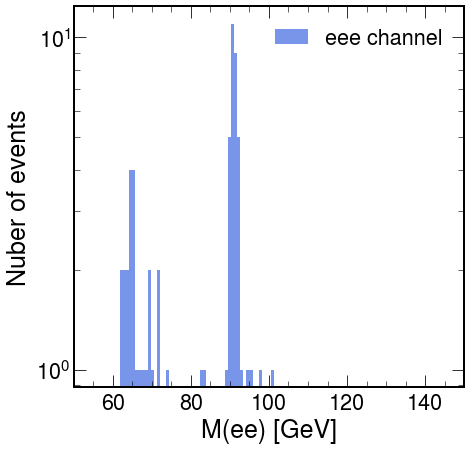

In [241]:
plt.figure(figsize=(7, 7))
plt.style.use(hep.style.CMS)
plt.hist(Mee,bins=50,color='royalblue',alpha=0.7,label='eee channel')
plt.xlim(50,150)
plt.xlabel('M(ee) [GeV]',fontsize=25)
plt.ylabel('Nuber of events',fontsize=25)
plt.yscale('log')
plt.legend()